In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import seaborn as sb

In [3]:

dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
#heart stroke data set https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [5]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [22]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [24]:
med1=dataset["bmi"].median()
dataset["bmi"].replace(np.nan,med1,inplace=True)

In [25]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

No handles with labels found to put in legend.


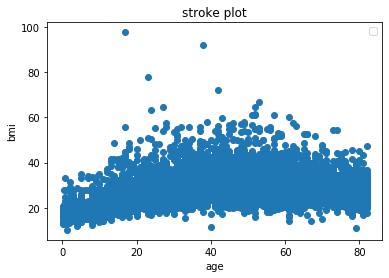

In [26]:
plt.scatter(dataset['age'],dataset['bmi'])
plt.title("stroke plot")
plt.legend()
plt.xlabel("age")
plt.ylabel("bmi")
plt.show()

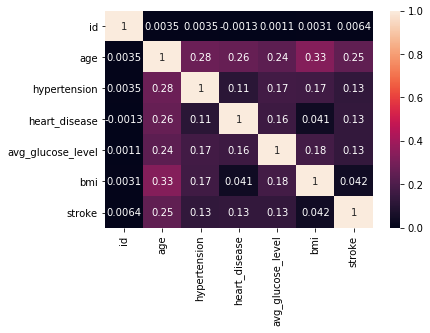

In [27]:
datasetcorr = dataset.corr()
sb.heatmap(datasetcor,annot=True)

In [28]:
linreg=lm.LinearRegression()
train_x=dataset[['age']]
train_y=dataset[['bmi']]

In [29]:
print(train_x)
print(train_y)

        age
0     67.00
1     61.00
2     80.00
3     49.00
4     79.00
5     81.00
6     74.00
7     69.00
8     59.00
9     78.00
10    81.00
11    61.00
12    54.00
13    78.00
14    79.00
15    50.00
16    64.00
17    75.00
18    60.00
19    57.00
20    71.00
21    52.00
22    79.00
23    82.00
24    71.00
25    80.00
26    65.00
27    58.00
28    69.00
29    59.00
...     ...
5080  29.00
5081  55.00
5082  44.00
5083  19.00
5084  67.00
5085  72.00
5086  51.00
5087  63.00
5088  64.00
5089   0.72
5090  26.00
5091  59.00
5092  76.00
5093  45.00
5094  13.00
5095   1.08
5096  57.00
5097  68.00
5098   9.00
5099  40.00
5100  82.00
5101  45.00
5102  57.00
5103  18.00
5104  13.00
5105  80.00
5106  81.00
5107  35.00
5108  51.00
5109  44.00

[5110 rows x 1 columns]
       bmi
0     36.6
1     28.1
2     32.5
3     34.4
4     24.0
5     29.0
6     27.4
7     22.8
8     28.1
9     24.2
10    29.7
11    36.8
12    27.3
13    28.1
14    28.2
15    30.9
16    37.5
17    25.8
18    37.8
19    28.1


In [30]:
linreg.fit(train_x,train_y)
print ('Coefficients: ',linreg.coef_)
print ('Intercept: ',linreg.intercept_)

Coefficients:  [[0.11042206]]
Intercept:  [24.08886357]


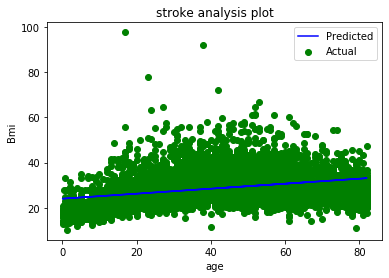

In [31]:
plt.scatter(dataset["age"],dataset["bmi"],color='green',label="Actual")
plt.plot(train_x,linreg.coef_[0][0]*train_x+linreg.intercept_[0],'-b',label="Predicted")
plt.title("stroke analysis plot")
plt.legend()
plt.xlabel("age")
plt.ylabel("Bmi")
plt.show()

In [37]:
y_predicted=linreg.predict(train_x)
dataset['predict']=y_predicted
print(y_predicted)
print(dataset.head())

[[31.48714134]
 [30.824609  ]
 [32.92262807]
 ...
 [27.95363554]
 [29.72038844]
 [28.94743404]]
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke    predict  
0       1

In [44]:
from sklearn import metrics as met

print('Mean Absolute Error:',met.mean_absolute_error(train_y,y_predicted))
print('Mean Squared Error:',met.mean_squared_error(train_y,y_predicted))
print('Root Mean Squared Error:',np.sqrt(met.mean_squared_error(train_y,y_predicted)))

Mean Absolute Error: 5.43926916598539
Mean Squared Error: 53.03819442727216
Root Mean Squared Error: 7.282732620882917


In [45]:
from sklearn.metrics import r2_score as r2
test_x=dataset[['age']]
test_y=dataset[['bmi']]
test_y_predicted=linreg.predict(test_x)

print("Mean absolute error:" ,np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error: " ,np.mean((test_y_predicted - test_y) ** 2))
print("R2-score:" ,r2(test_y, test_y_predicted) )

Mean absolute error: bmi    5.439269
dtype: float64
Mean square error:  bmi    53.038194
dtype: float64
R2-score: 0.10516770093385697
